In [71]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

DATA_FEATURE_TRANSFORM_PATH = './preprocessed_feature_transformation.csv'
DATA_FEATURE_CONSTRUCTION_PATH = './preprocessed_feature_construction.csv'

In [72]:
df_ft = pd.read_csv(DATA_FEATURE_TRANSFORM_PATH)
df_fc = pd.read_csv(DATA_FEATURE_CONSTRUCTION_PATH)

X_ft = df_ft.drop('is_churned', axis=1)
X_fc = df_fc.drop('is_churned', axis=1)
y = df_ft['is_churned']

In [73]:
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_ft, y, test_size=0.25, random_state=42)
# Display shapes of the splits
print("Shape of X_train_ft:", X_train_ft.shape)
print("Shape of X_test_ft:", X_test_ft.shape)
print("Shape of y_train_ft:", y_train_ft.shape)
print("Shape of y_test_ft:", y_test_ft.shape)

Shape of X_train_ft: (6000, 24)
Shape of X_test_ft: (2000, 24)
Shape of y_train_ft: (6000,)
Shape of y_test_ft: (2000,)


In [74]:
rf_model_ft = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)

# Train the model
rf_model_ft.fit(X_train_ft, y_train_ft)

# Predict on test set
y_pred_rf_ft = rf_model_ft.predict(X_test_ft)

# Evaluate model performance
print("Evaluate model performance on Feature Transformation")
print("\nAccuracy:", accuracy_score(y_test_ft, y_pred_rf_ft))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_ft, y_pred_rf_ft))
print("\nClassification Report:\n", classification_report(y_test_ft, y_pred_rf_ft))

Evaluate model performance on Feature Transformation

Accuracy: 0.7465

Confusion Matrix:
 [[1487    9]
 [ 498    6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85      1496
           1       0.40      0.01      0.02       504

    accuracy                           0.75      2000
   macro avg       0.57      0.50      0.44      2000
weighted avg       0.66      0.75      0.64      2000



In [75]:
X_train_fc, X_test_fc, y_train_fc, y_test_fc = train_test_split(X_fc, y, test_size=0.25, random_state=42)
# Display shapes of the splits
print("Shape of X_train_fc:", X_train_fc.shape)
print("Shape of X_test_fc:", X_test_fc.shape)
print("Shape of y_train_fc:", y_train_fc.shape)
print("Shape of y_test_fc:", y_test_fc.shape)

Shape of X_train_fc: (6000, 35)
Shape of X_test_fc: (2000, 35)
Shape of y_train_fc: (6000,)
Shape of y_test_fc: (2000,)


In [76]:
rf_model_fc = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)

# Train the model
rf_model_fc.fit(X_train_fc, y_train_fc)

# Predict on test set
y_pred_rf_fc = rf_model_fc.predict(X_test_fc)

# Evaluate model performance
print("Evaluate model performance on Feature Construction")
print("\nAccuracy:", accuracy_score(y_test_fc, y_pred_rf_fc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_fc, y_pred_rf_fc))
print("\nClassification Report:\n", classification_report(y_test_fc, y_pred_rf_fc))

Evaluate model performance on Feature Construction

Accuracy: 0.747

Confusion Matrix:
 [[1490    6]
 [ 500    4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.85      1496
           1       0.40      0.01      0.02       504

    accuracy                           0.75      2000
   macro avg       0.57      0.50      0.44      2000
weighted avg       0.66      0.75      0.64      2000



In [77]:
joblib.dump(
  rf_model_fc,
  "model_rfc_feature_construction.joblib"
)

['model_rfc_feature_construction.joblib']

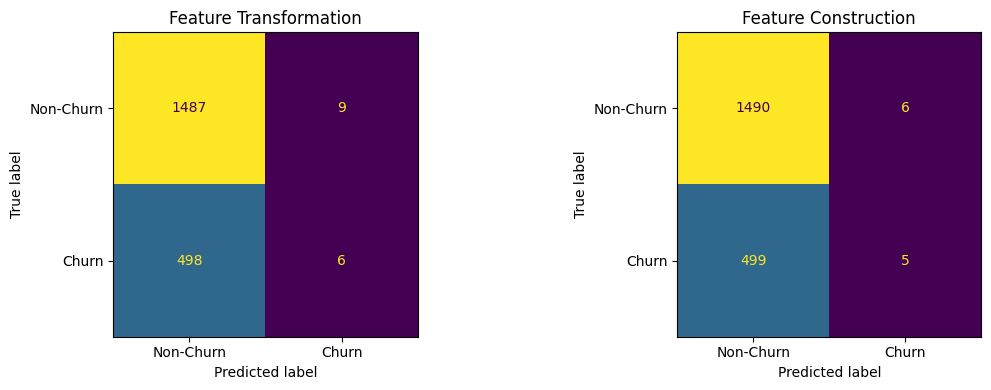

In [78]:
# confusion matrix comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix: Feature Transformation
cm_ft = np.array([[1487, 9],
                  [498, 6]])

ConfusionMatrixDisplay(cm_ft, display_labels=["Non-Churn", "Churn"]) \
    .plot(ax=axes[0], values_format='d', colorbar=False)
axes[0].set_title("Feature Transformation")

# Confusion Matrix: Feature Construction
cm_fc = np.array([[1490, 6],
                  [499, 5]])

ConfusionMatrixDisplay(cm_fc, display_labels=["Non-Churn", "Churn"]) \
    .plot(ax=axes[1], values_format='d', colorbar=False)
axes[1].set_title("Feature Construction")

plt.tight_layout()
plt.show()

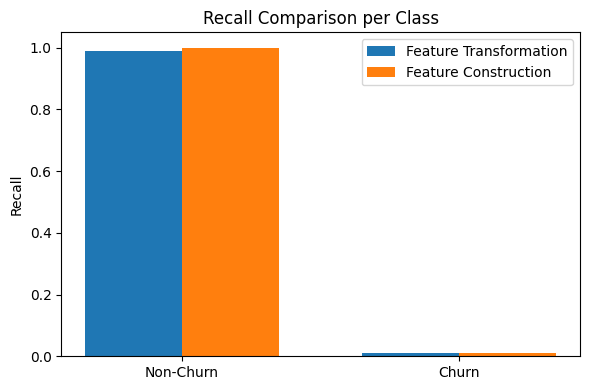

In [79]:
# Bar Chart Recall per Class
labels = ["Non-Churn", "Churn"]

recall_ft = [0.99, 0.01]
recall_fc = [1.00, 0.01]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(6, 4))
plt.bar(x - width/2, recall_ft, width, label="Feature Transformation")
plt.bar(x + width/2, recall_fc, width, label="Feature Construction")

plt.xticks(x, labels)
plt.ylabel("Recall")
plt.title("Recall Comparison per Class")
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

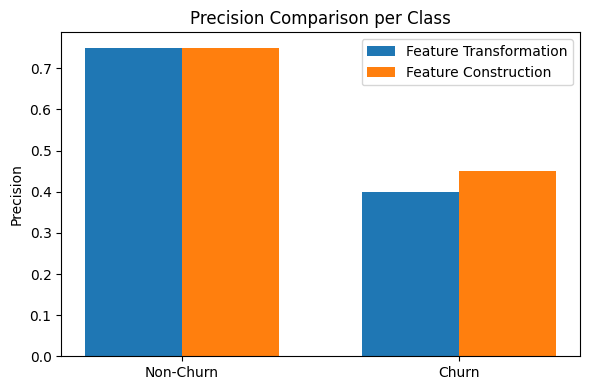

In [80]:
# Precision–Recall Comparison
precision_ft = [0.75, 0.40]
precision_fc = [0.75, 0.45]

plt.figure(figsize=(6, 4))
plt.bar(x - width/2, precision_ft, width, label="Feature Transformation")
plt.bar(x + width/2, precision_fc, width, label="Feature Construction")

plt.xticks(x, labels)
plt.ylabel("Precision")
plt.title("Precision Comparison per Class")
plt.legend()
plt.tight_layout()
plt.show()

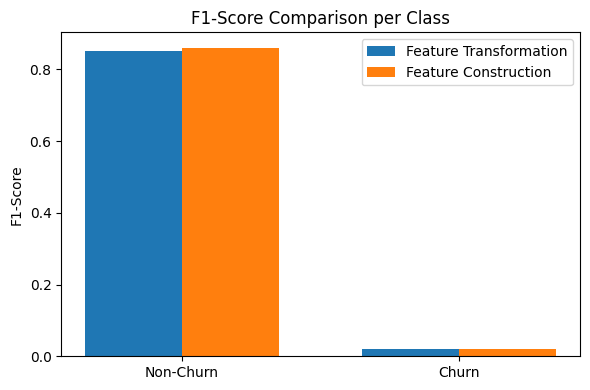

In [81]:
# F1 Score Comparison
f1_ft = [0.85, 0.02]
f1_fc = [0.86, 0.02]

plt.figure(figsize=(6, 4))
plt.bar(x - width/2, f1_ft, width, label="Feature Transformation")
plt.bar(x + width/2, f1_fc, width, label="Feature Construction")

plt.xticks(x, labels)
plt.ylabel("F1-Score")
plt.title("F1-Score Comparison per Class")
plt.legend()
plt.tight_layout()
plt.show()